PREDICTING HOUSE PRICES USING LINEAR REGRESSION


NAME: BRIAN KIGEN


BUSINNESS UNDERSTANDING


Stake holder: Emarld City Realators

Business problem: Emarld City Realators need to provide prospective home seller with guidance improve the values of their homes through using machine learning to estimate the sale  of their properties.

Problem Statement: I will use house data set from King House Sales dataset to build a linear regression model that best predict sales  price  for properties.

DATA UNDERSTANDING

The project uses the king County House Sales dataset.The data set include all data of home sales from 2014 to 2015.
The data  can be found kc_house_data.csv in the folder along with descritpion of feature found in  column_names.md
The original data include sale data for 21,597homes with 20 different features which includes

date - Date house was sold.

price - Sale price (prediction target)

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms

sqft_living - Square footage of living space in the home

sqft_lot - Square footage of the lot

floors - Number of floors (levels) in house

waterfront - Whether the house is on a waterfront

view - Quality of view from house

condition - How good the overall condition of the house is. Related to maintenance of house

grade - Overall grade of the house. Related to the construction and design of the house

sqft_above - Square footage of house apart from basement

sqft_basement - Square footage of the basement

yr_built - Year when house was built

yr_renovated - Year when house was renovated

zipcode - ZIP Code used by the United States Postal Service



DATA PREPARATION

Data cleaning

imports

In [336]:
#importing libraries and packages
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.api as sm
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [337]:
# importing data set
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [338]:
# view information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From the above we can see that waterfront and year renovated have missing values because the total number of rows 21597.

In [339]:
# check the shape of the data
df.shape

(21597, 21)

In [340]:
# Summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


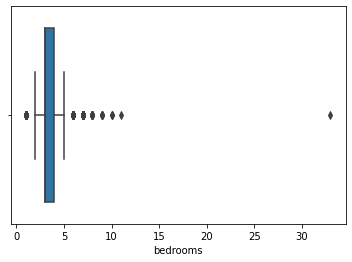

In [341]:
#checking outliers in bedroom column
sns.boxplot(x='bedrooms',data=df);

In [342]:
# Drop rows that contain any value in the list

df = df[(df.bedrooms != 33)]

In [343]:
def boxplot(df,column):
    sns.boxplot(x=column,data=df);
    

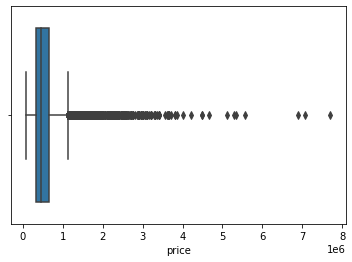

In [344]:
boxplot(df,'price')

DATA PROCESSING

To start with  we will drop columns that will not be usefull in our project.we will iignore some of thhe following features from our data set:
date
view
yr_renovated
zipcode
lat
long


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     19220 non-null  float64
 9   view           21533 non-null  float64
 10  condition      21596 non-null  int64  
 11  grade          21596 non-null  int64  
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21596 non-null  object 
 14  yr_built       21596 non-null  int64  
 15  yr_renovated   17754 non-null  float64
 16  zipcode        21596 non-null  int64  
 17  lat            21596 non-null  float64
 18  long  

Cleaning functions.

This functions will be used  to clean our data

In [346]:
#Cheicking missing value
def look_nulls(df):
    missing_list =[]
    for column in df.columns:
        if df[column].isna().sum() > 0:
            missing_list.append(column)
    return missing_list

In [347]:
#number of missing values in dataset
def show_no_sum(df,column):
    return df[column].isna().sum()

In [348]:
# filling missing values with values
def fill_na(df,column,value):
    df[column]= df[column].fillna(value)

Looking fo NAN values and missing values

In [349]:
# looking of  nulls values  in dataset
look_nulls(df)

['waterfront', 'view', 'yr_renovated']

In [350]:
# number of missing values in the waterfront column
show_no_sum(df,['waterfront'])

waterfront    2376
dtype: int64

In [351]:
# Replace the Non  NAN value with 0
fill_na(df,['waterfront'],0)


In [352]:
# Replace the Non  NAN value with 0
fill_na(df,['yr_renovated'],0)


In [353]:
# Recheck if there is any missing column
look_nulls(df)

['view']

In [354]:
df['sqft_basement'].value_counts()
# Missing data represented by '?' - 454 observations missing data


0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
248.0         1
1135.0        1
1284.0        1
1548.0        1
1248.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [355]:
#look at the  percentage account to the values
df.sqft_basement.value_counts(normalize = True)




0.0       0.593906
?         0.021022
600.0     0.010048
500.0     0.009678
700.0     0.009631
            ...   
248.0     0.000046
1135.0    0.000046
1284.0    0.000046
1548.0    0.000046
1248.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [356]:
df['sqft_basement'].replace('?', 0.0, inplace = True) # replace the ? with 0 bbecause  it account 60%
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int) # convert into integer

In [357]:
# Summary statistics
df.describe()



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21533.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,0.233874,3.409752,7.657946,1788.631506,285.702954,1971.000787,68.761391,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,0.765702,0.650471,1.173218,827.763251,439.825454,29.375460,364.045627,53.514040,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


the avarage  price  of house 5.4 million dollars.

The maximmum price of  house 7.7 million dollars.

we can see outlier in bedrooms column is 33 bedrooms




Exploratory Data Analysis

UNIVARIATE ANALYSIS

Checking for outliers in our dataset

In [358]:
#Create fuunctions for box plot
def boxplot(df,column):
    sns.boxplot(x=column,data=df);

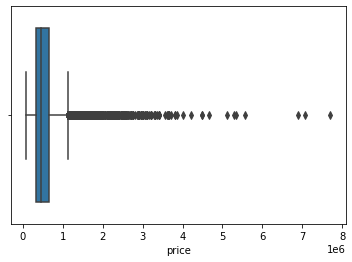

In [359]:
#outliers in prices
boxplot(df,'price')


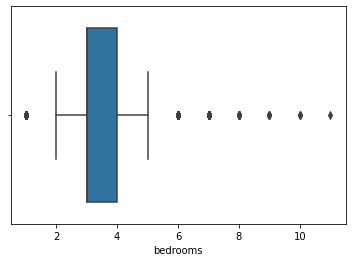

In [360]:
boxplot(df,'bedrooms')

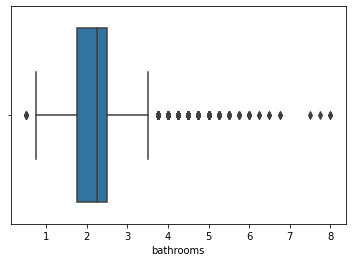

In [361]:
boxplot(df,'bathrooms')

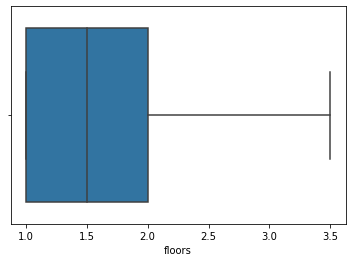

In [362]:
boxplot(df,'floors')



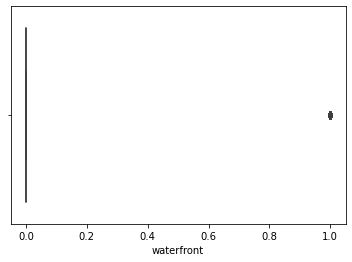

In [363]:
boxplot(df,'waterfront')


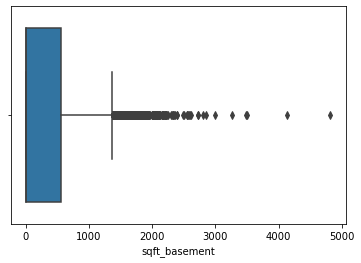

In [364]:
boxplot(df,'sqft_basement')


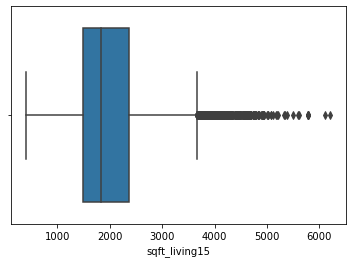

In [365]:
boxplot(df,'sqft_living15')


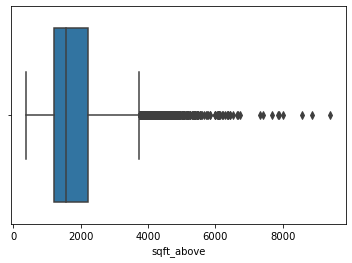

In [366]:
boxplot(df,'sqft_above')


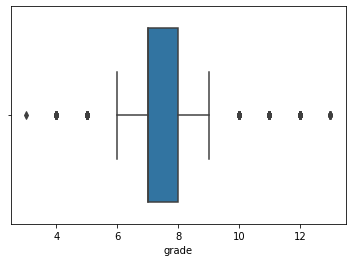

In [367]:
boxplot(df,'grade')


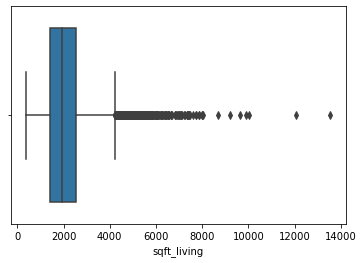

In [368]:
boxplot(df,'sqft_living')

Look   distribution of Price through Histogram


In [369]:
# First create a function  for plotting histogram
def create_hist(feature, num_bins, title, x_label, y_label, color='blue',plot_size = (10,6)):
    plt.figure(figsize=plot_size)
    feature.hist(bins = num_bins, color=color, grid = False)
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;

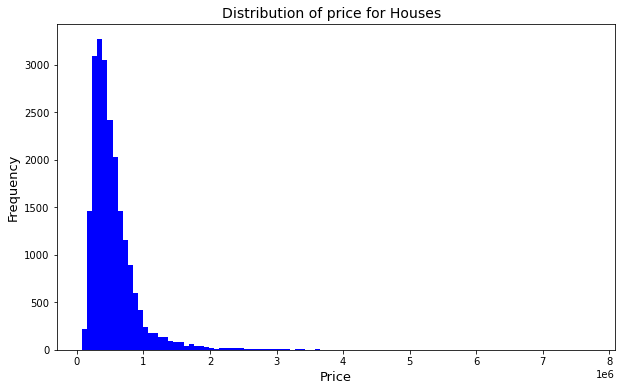

In [370]:
create_hist(df['price'], 
            num_bins = 100, 
            title = 'Distribution of price for Houses  ',
           x_label = 'Price',
           y_label = 'Frequency')

In [371]:
kdf = df.query('price < price.quantile(.95)')


We can see above the distribution target is normaly distributed..it is right skewed . I will use log transformation to make the target well distributed in my linear regression model.

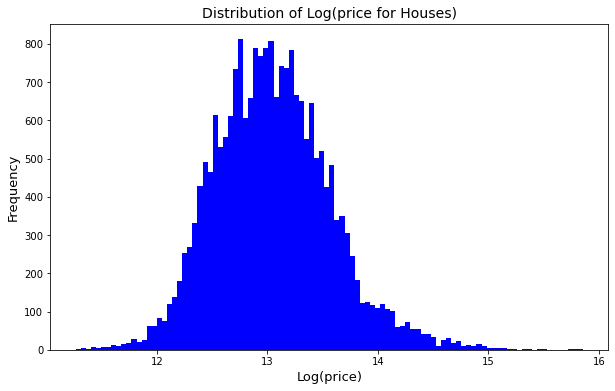

In [372]:
# Using log transformation to make it normalized data
create_hist(np.log(df['price']), 
            num_bins = 100, 
            title = 'Distribution of Log(price for Houses)',
           x_label = 'Log(price)',
           y_label = 'Frequency')

logging the data helps in making the data normaly distributed.

Categorical Data

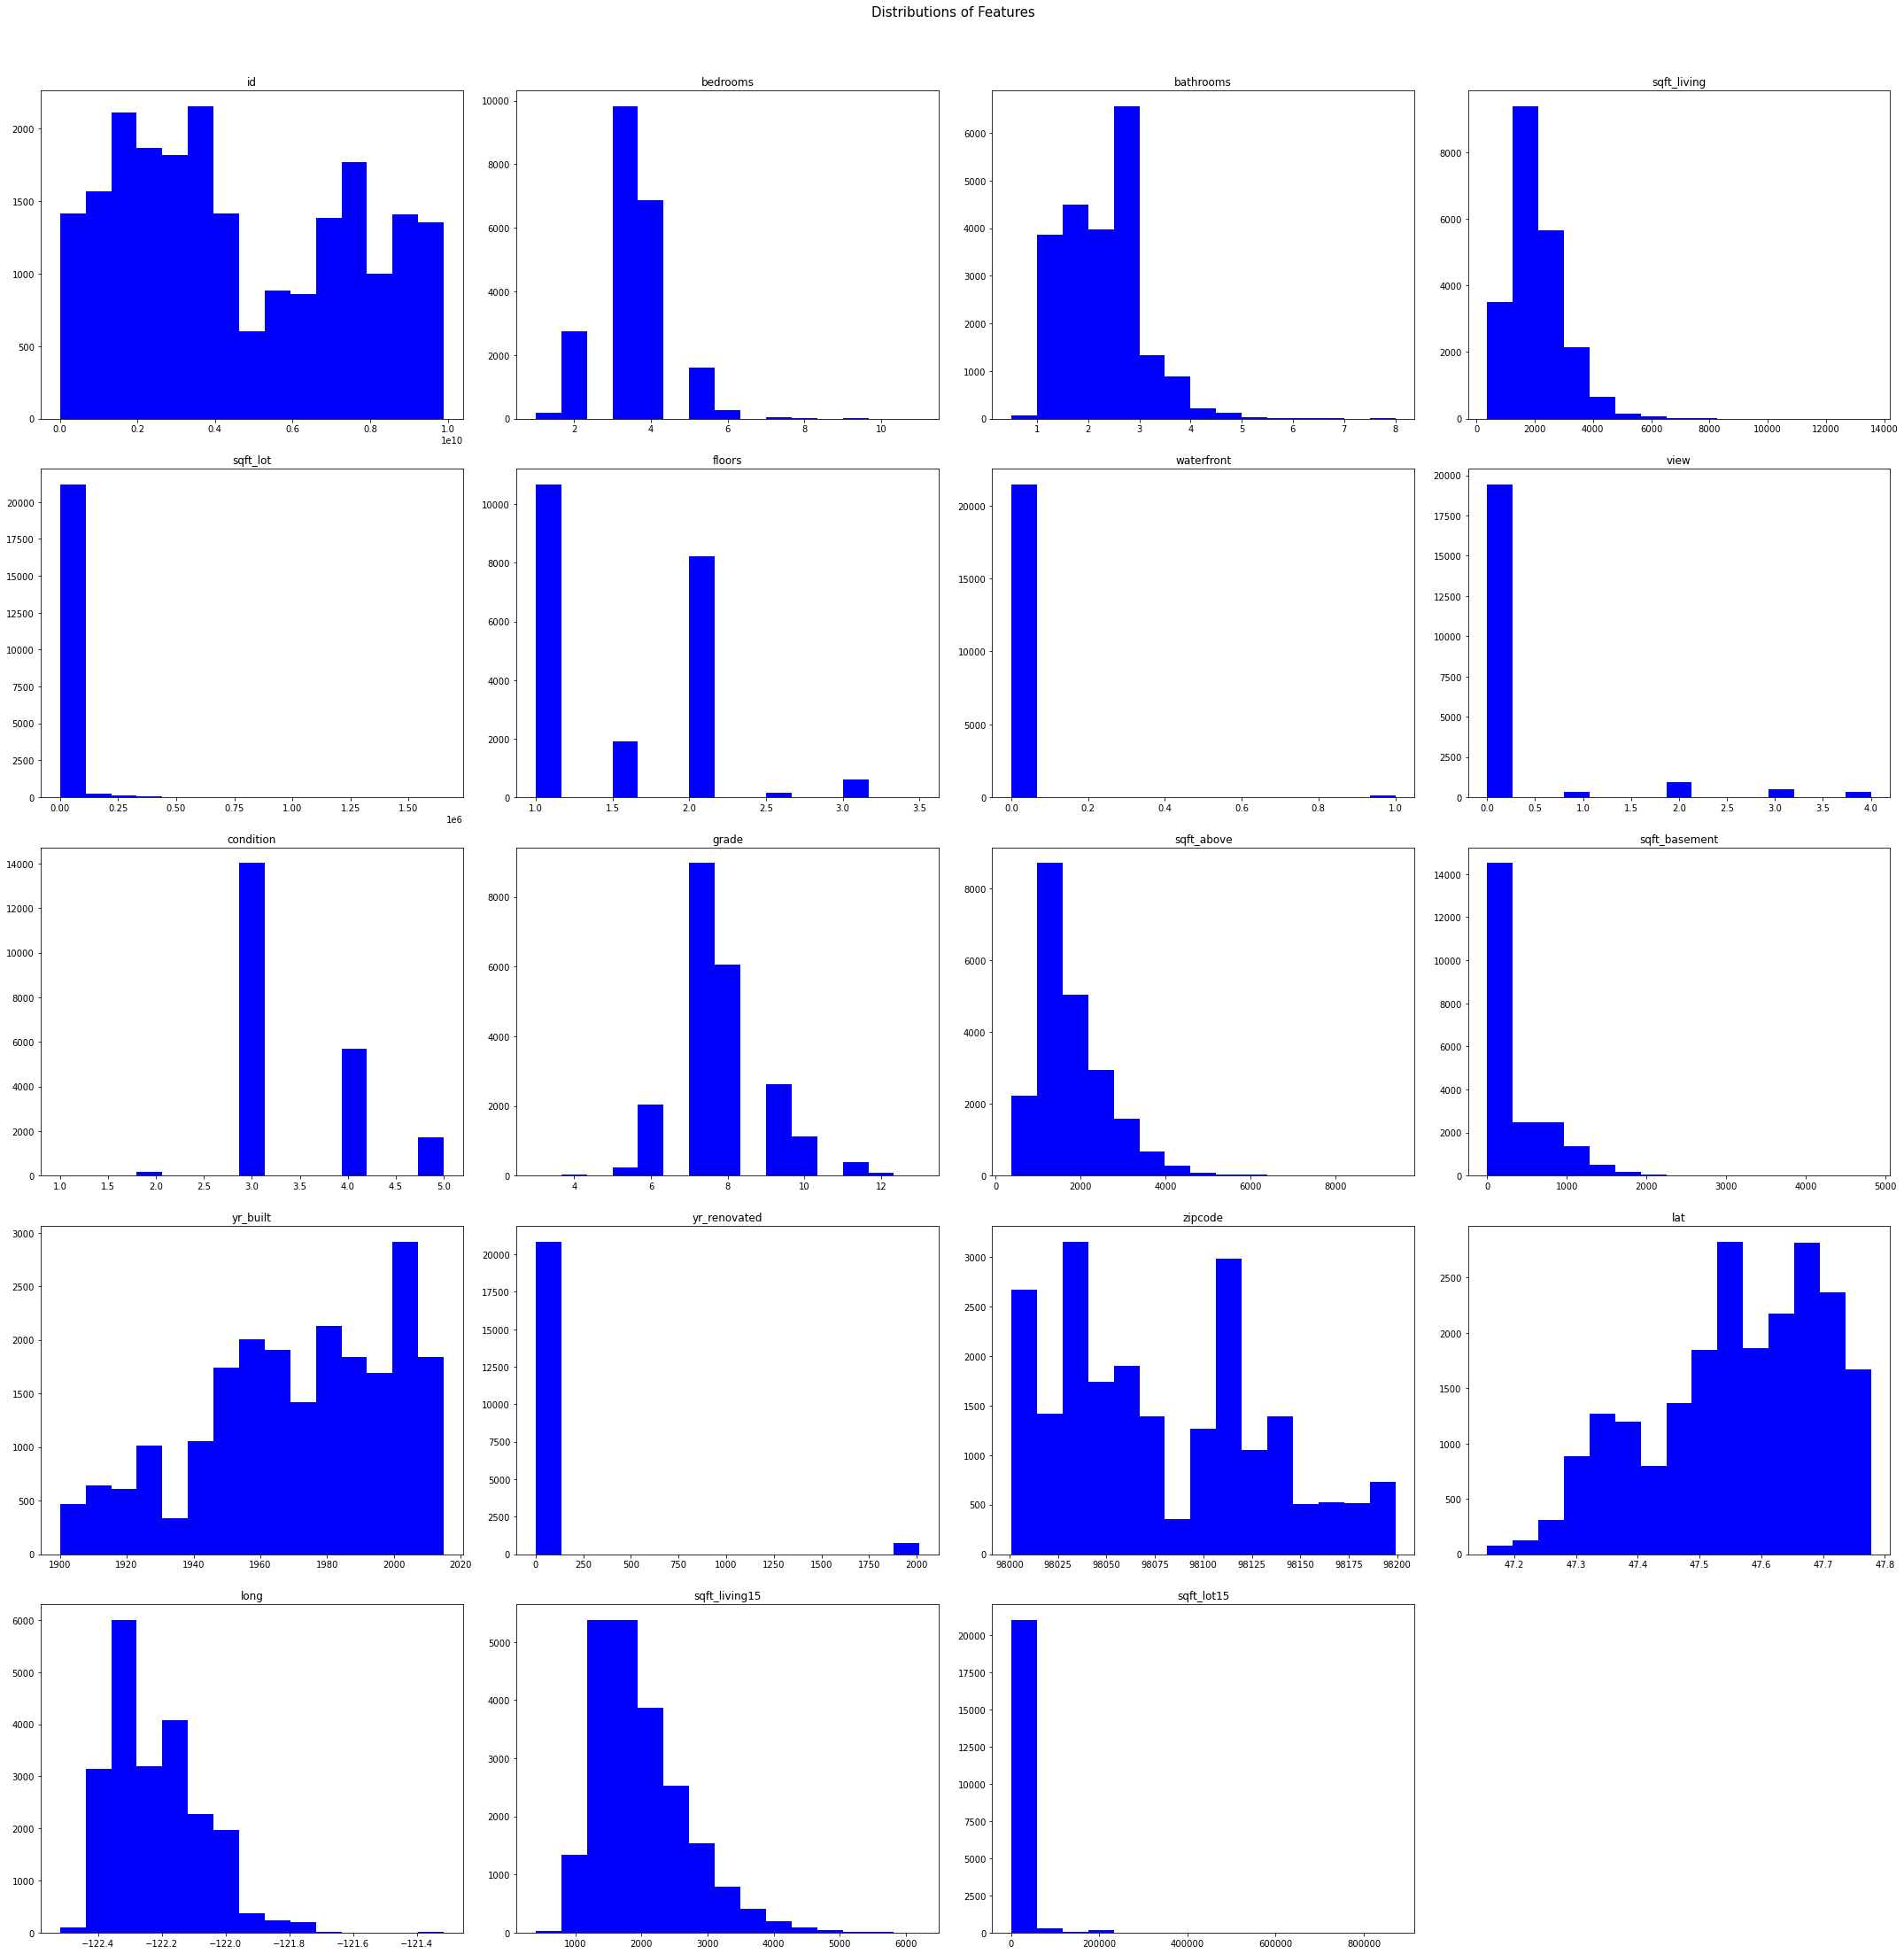

In [373]:
df.drop(columns='price').hist(figsize=(30, 30), bins = 15, grid = False, color = 'blue')
plt.suptitle('Distributions of Features', x = 0.5, y = 1.02, size = 15)
plt.tight_layout()

I have  visualized feauture which will  be used in my anlyisis.As we can see from the above  cells majority of the categorical features are not normally distributed. 

BIVARIATE ANALYSIS

IndexError: index 4 is out of bounds for axis 0 with size 4

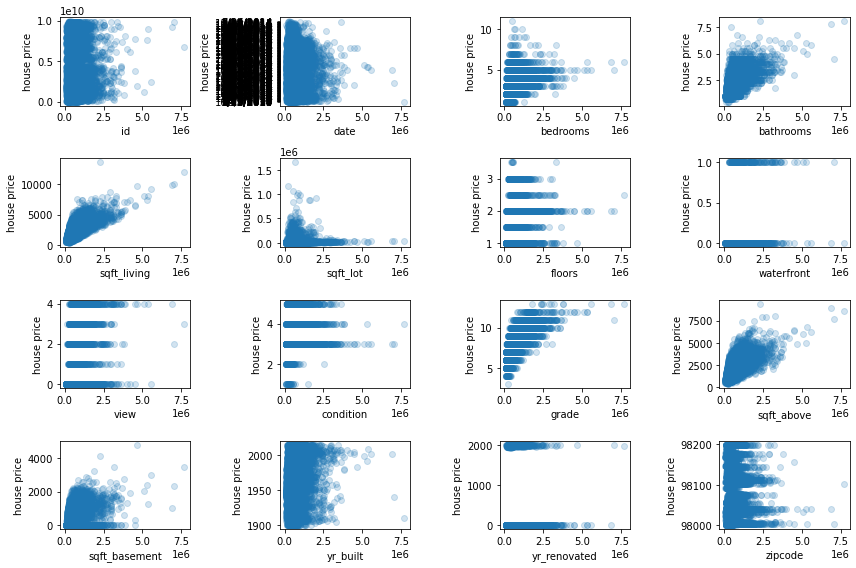

In [374]:
#look at the correlation between the categorical features  and the target (price of house)
scatterplot_data = df.drop("price", axis=1)

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//4][index%4]
    ax.scatter(df['price'], df[col], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("house price")

we can see linear relationship between the categorical data with target feature(house price)

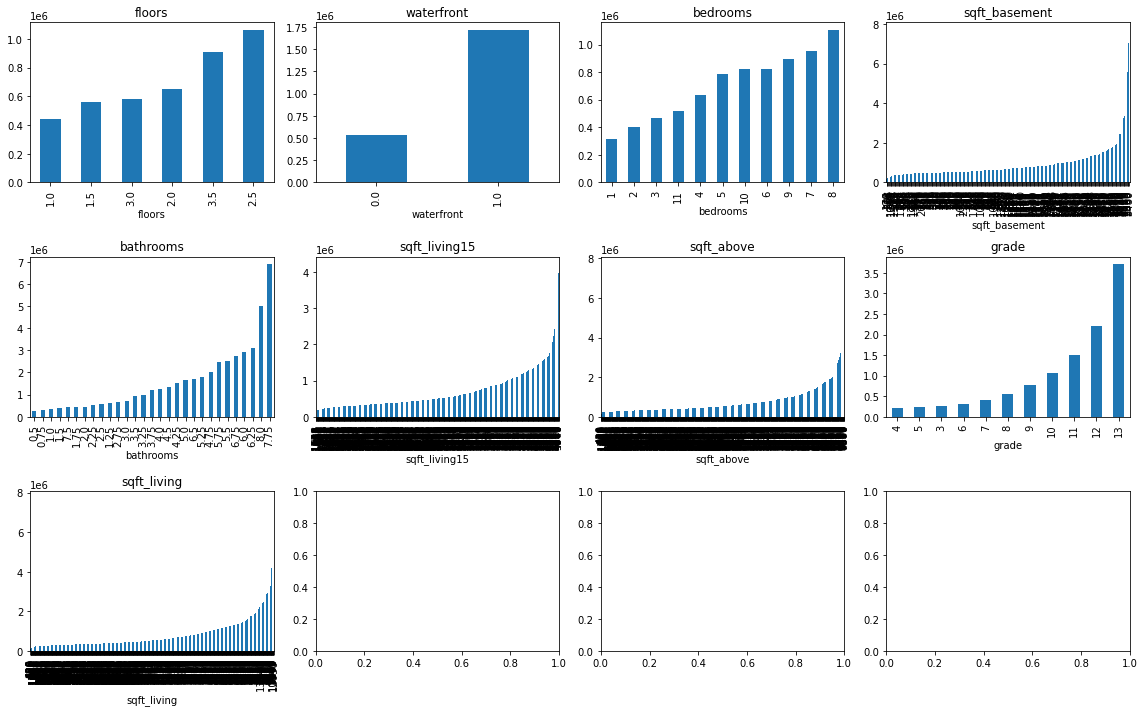

In [ ]:

fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (16,10))

categoricals = ['floors','waterfront','bedrooms','sqft_basement','bathrooms','sqft_living15','sqft_above','grade','sqft_living']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)              # group values together by column of interest
        .mean()['price']            # take the mean of the saleprice for each group
        .sort_values()              # sort the groups in ascending order
        .plot
        .bar(ax = ax))                # create a bar graph on the ax
    
    ax.set_title(col)               # Make the title the name of the column
    
fig.tight_layout()

we have plot prices of the house against the categorical data.

In [ ]:
df['date']=pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21596, dtype: datetime64[ns]

In [ ]:

#Create two new columns for year and the months
df['year']= df['date'].apply(lambda x : x.year)
df['month']= df['date'].apply(lambda x : x.month)


In [ ]:
# Create our dummy variables for the categorical features

cond_dummies = pd.get_dummies(df['condition'], prefix = 'cond', drop_first = True)
grade_dummies = pd.get_dummies(df['grade'], prefix = 'grade', drop_first = True)


In [ ]:
cond_dummies.nunique()

cond_2    2
cond_3    2
cond_4    2
cond_5    2
dtype: int64

In [ ]:
grade_dummies.nunique()

grade_4     2
grade_5     2
grade_6     2
grade_7     2
grade_8     2
grade_9     2
grade_10    2
grade_11    2
grade_12    2
grade_13    2
dtype: int64

In [375]:
# Drop the original column and concatenate our dummy variable columns with our original dataframe

df = df.drop(['condition', 'grade'], axis = 1)
df_clean = pd.concat([df, cond_dummies, grade_dummies], axis = 1)


In [376]:
df_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:xlabel='month'>

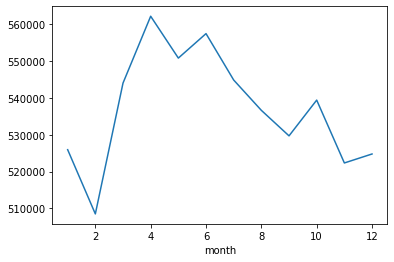

In [ ]:
#plot graph of avarage price of house over the month
df.groupby('month').mean()['price'].plot()

From the line graph above we can see that the highest avarage price of the 560000 dollar which was sold on April while the lowest
is 510000 dollars wchich sold on february.From the graph abbbove we cans see the price  are fluctuating rising and falling over period of time.

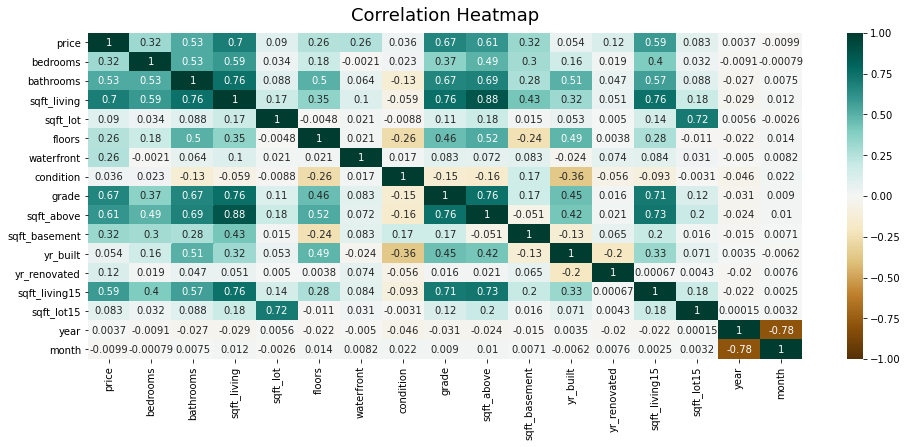

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

 Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).

 High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.

Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.

 Low degree: When the value lies below + .29, then it is said to be a small correlation.

 No correlation: When the value is zero.

From the heat mape we can see colinearity of variable agaisnt each other.


In [ ]:
# show the relationship between categorical features with the target 
corr_matrix = df.corr()[[ 'price']].sort_values('price')
corr_matrix


,price
month,-0.009926
year,0.003736
condition,0.036031
yr_built,0.053965
sqft_lot15,0.082849
sqft_lot,0.089879
yr_renovated,0.117858
floors,0.256820
waterfront,0.264308
bedrooms,0.315961


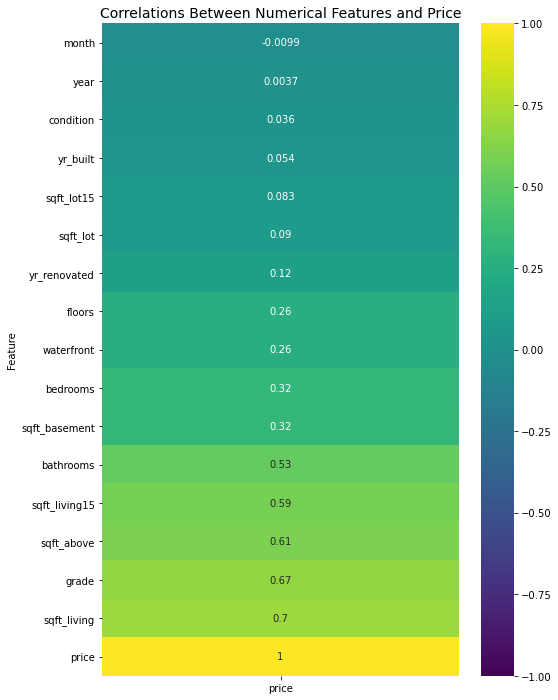

In [ ]:
#Heat map to show correlation of numerical features with price
plt.figure(figsize=(8, 12))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Numerical Features and Price', fontdict={'fontsize':14})
plt.ylabel('Feature');

We have created a heatmap to show the realtionship between the target price and the categorical data.
From the plot above we can see that square fit living has the hihgest correllation  and the lowest correlation iis condition .

In [ ]:
#Take only features that have correlation coefficient of o.25
corr_target = abs(corr_matrix)
target_num_features = corr_target.loc[corr_target['price'] >= 0.25, :]
target_num_features

,price
floors,0.256820
waterfront,0.264308
bedrooms,0.315961
sqft_basement,0.321103
bathrooms,0.525915
sqft_living15,0.585267
sqft_above,0.605392
grade,0.667964
sqft_living,0.701929
price,1.000000


I have picked categorical feature above o.25 which I will be able to usee in order to build my model

Modelling

In [ ]:
def reg_qq_sced(y, X, add_constant=True, qq=True, sced=True):
    """
    Display a the summary output of a linear regression model, with predictors X and target y.

    Also displays a QQ plot and residual plot by default. These can be toggled off.
    
    The function will add a constant to the predictors by default, and this can be toggled off.
    """
    # Run a linear regression and display the summary
    if add_constant:
        X_sm = sm.add_constant(X, has_constant='add')
    else:
        X_sm = X
    model = sm.OLS(y, X_sm).fit()
    display(model.summary())

    # Display a QQ plot
    if qq:
        fig_qq = sm.graphics.qqplot(model.resid, line='45', fit=True,)
        fig_qq.suptitle('QQ plot for residual normality check')
    else:
        pass

    # Display a plot of predicted values vs. residuals
    if sced:    
        preds = model.predict(X_sm)
        residuals = model.resid
        fig_resid, ax = plt.subplots(figsize=(10,5))
        fig_resid.suptitle('Predicted vs. residual plot for homoscedasticity check')
        ax.scatter(preds, residuals, alpha=0.2)
        ax.plot(preds, [0 for i in range(len(X_sm))])
        ax.set_xlabel("Predicted Value")
        ax.set_ylabel("Actual - Predicted Value");
    else:
        pass
    lr = LinearRegression()
    lr.fit(X_sm, y)
    print(f'Model adjusted R-squared: {model.rsquared_adj}')
    print(f'Model Mean Absolute Error: {metrics.mean_absolute_error(y, lr.predict(X_sm))}')

In [ ]:
#check the columns we have
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'year', 'month'],
      dtype='object')

In [ ]:
# dropping id,zip code, and date columns
df.drop(["date", "year","yr_built",  
                  'yr_renovated',
                  "month"], axis = 1, inplace = True)

Text(0.5, 1.02, 'Histograms of numerical features')

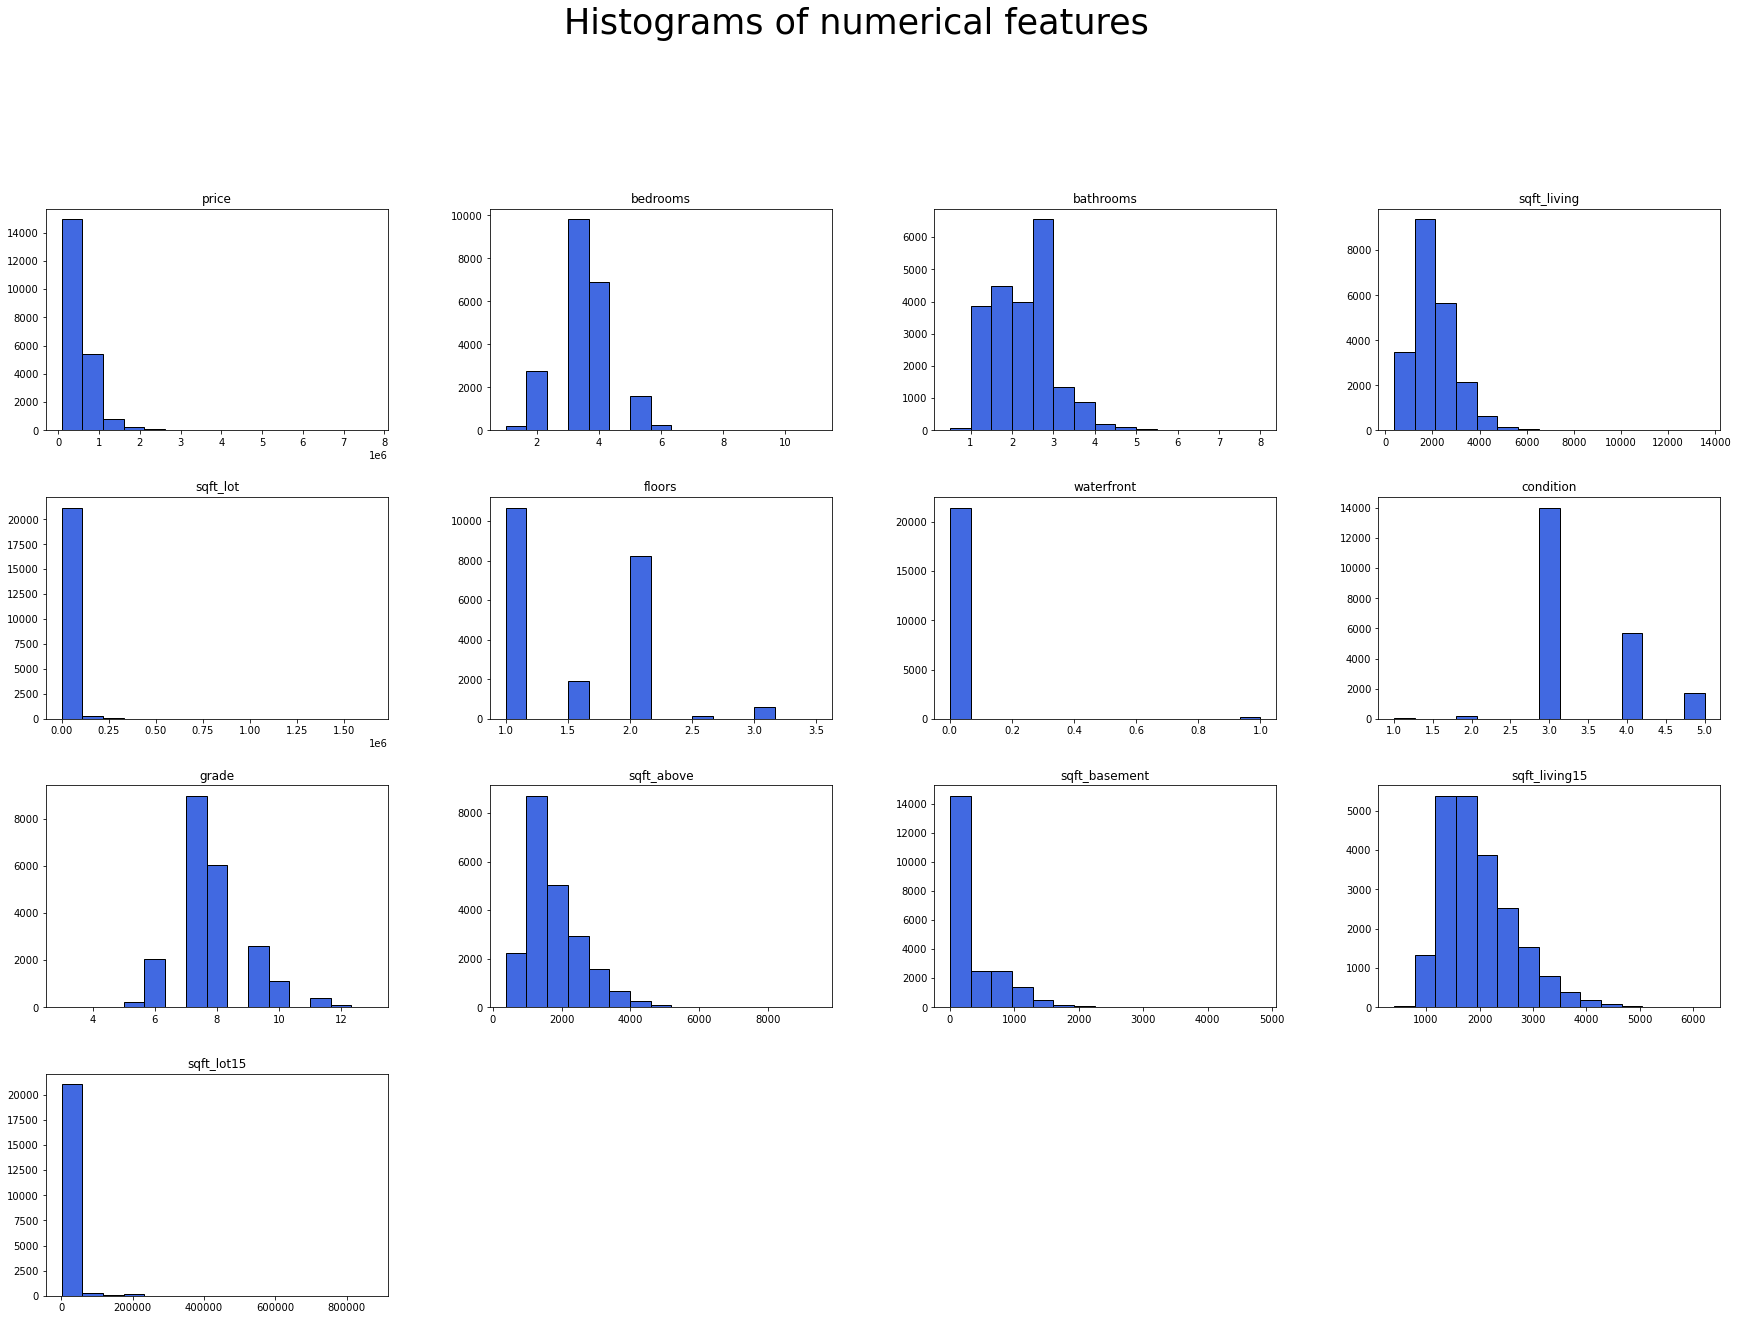

In [ ]:
df.hist(figsize=(30, 20), bins = 15, edgecolor = 'black', grid = False, color = 'royalblue')
plt.suptitle('Histograms of numerical features', x = 0.5, y = 1.02, size = 35)

Model 1

Normalization of Data

In [ ]:
#creating and label features
x = df.drop(columns = ["price"])
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0,1340,5650
1,3,2.25,2570,7242,2.0,0.0,3,7,2170,400,1690,7639
2,2,1.00,770,10000,1.0,0.0,3,6,770,0,2720,8062
3,4,3.00,1960,5000,1.0,0.0,5,7,1050,910,1360,5000
4,3,2.00,1680,8080,1.0,0.0,3,8,1680,0,1800,7503


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        01:53:55   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.401e+04   4410.123     -9.980      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8688      1.939    144.820      0.000     277.067     284.670
==============================================================================
Omnibus:                    14801.492   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542642.481
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.4926806685097609
Model Mean Absolute Error: 173822.136114186


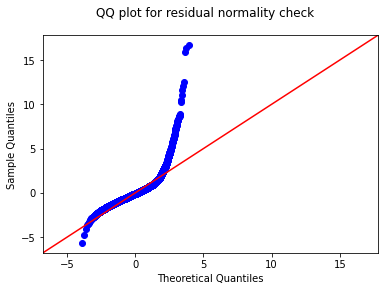

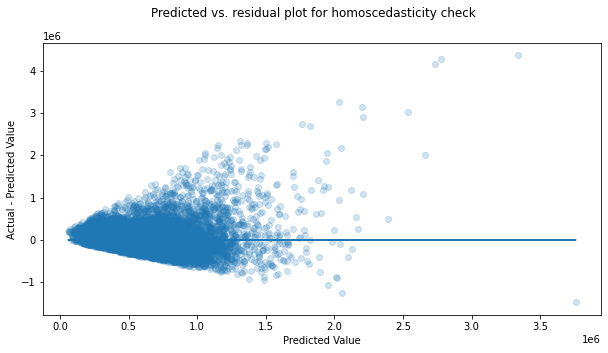

In [ ]:
y = df['price']
X_baseline = df['sqft_living']
# Run the model
reg_qq_sced(y, X_baseline)

Regression Resulst

Findings

From the model above we can see that R-squaredvalue is 49%.

the Mean Absolute Error (MAE) is a model performance metric that reflects the mean of the absolute values of the individual prediction errors on over all instances in the model. We're using this performance metric throughout this analysis because its value is directly reportable to our clients in clearly conveying business use.

In this model, the MAE is 173824.887 which is very high

We need to check homoscedasticity, which indicates whether a dependent variable's variability is equal across values of the independent variable. Given our plot above this model does not meet the homoscedasticity assumption.

We can see from the Q-Q plot above that our redisuals are normally distributed and its Durbin-Watson score is 1.982 (which is well within the accepted range of 1.5 to 2.5. Thus, this model meets the normality assumption.

Model with eleected home features

What features of their home seller  change or improve  increasse their value of their home abd by how much?

In this model will add more feature to improve our metrics in our models  and by how much

Predictors:

Bedrooms

Bathrooms

sqft_living

Floor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     5582.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        01:53:56   Log-Likelihood:            -2.9971e+05
No. Observations:               21596   AIC:                         5.994e+05
Df Residuals:                   21591   BIC:                         5.995e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.675e+04   7816.034     11.099      0.000    7.14e+04    1.02e+05
bedrooms    -6.388e+04   2448.956    -26.084      0.000   -6.87e+04   -5.91e+04
bathrooms    8877.7826   3831.002      2.317      0.020    1368.736    1.64e+04
sqft_living   312.5809      3.112    100.455      0.000     306.482     318.680
floors        -89.4827   3780.649     -0.024      0.981   -7499.833    7320.868
==============================================================================
Omnibus:                    14301.345   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           480356.963
Skew:                           2.706   Prob(JB):                         0.00
Kurtosis:                      25.462   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.50831176004548
Model Mean Absolute Error: 170315.27565508807


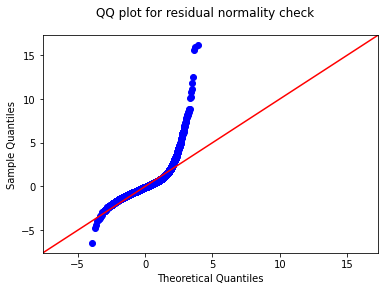

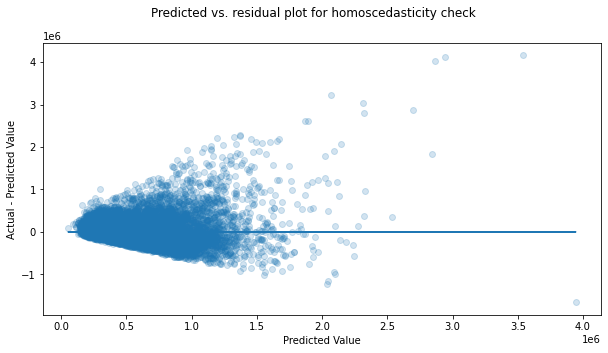

In [ ]:
# create a new model wiith additional features
x=df[['bedrooms','bathrooms','sqft_living','floors']]
y=df['price']
#Run the model
reg_qq_sced(y,x)

Regression finding with Quantative feautes of home

R_squared values is 50 

The MAE is 170360.1226 which is slight lower to our bbaseline model( 173824.887).

Normality

we can see from our Q_Q plot and Durbin_Watson that our model pass meets the  normmality assumption

In [ ]:
# Run Goldfeld Quandt test to further confirm homoscedasticity
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y, x)
list(zip(name, test))

[('F statistic', 0.9332031339977876), ('p-value', 0.9998351584020874)]

Since bathrooms does not seem to have a statistically significant linear relationship with sale price, let's drop this feature from this model to see how the metrics are affected. Further, let's remove the top 5% of price outliers in our dataframe.

lets create a new model without bedroom column

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     6996.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        01:53:57   Log-Likelihood:            -3.0004e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21592   BIC:                         6.001e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.743e+04   5976.218     -7.937      0.000   -5.91e+04   -3.57e+04
bathrooms   -8914.0650   3828.637     -2.328      0.020   -1.64e+04   -1409.654
sqft_living   284.4446      2.964     95.958      0.000     278.634     290.255
floors       9934.2591   3819.778      2.601      0.009    2447.212    1.74e+04
==============================================================================
Omnibus:                    14837.835   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           548069.241
Skew:                           2.828   Prob(JB):                         0.00
Kurtosis:                      27.023   Cond. No.                     8.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.49284127710243886
Model Mean Absolute Error: 173573.3346143578


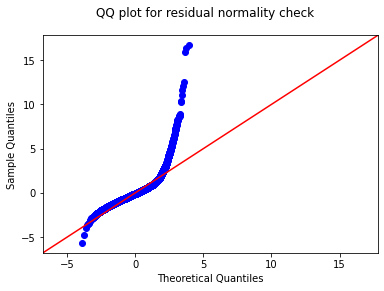

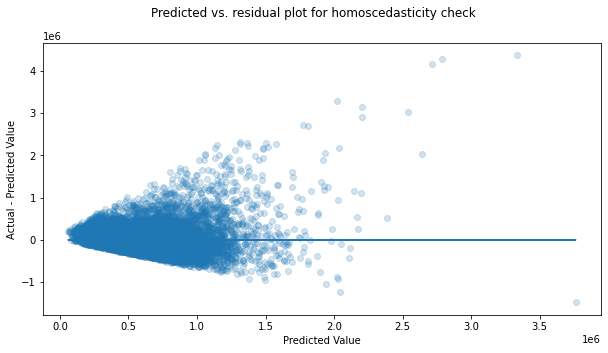

In [ ]:
x_quantitave=df[['bathrooms','sqft_living','floors']]
y=df['price']
#Run the model
reg_qq_sced(y,x_quantitave)

R-squared value 49%

The MAE is slightly higher than the previous model

In [377]:
df_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


SECOND MODEL

What features of their home seller  change or improve  increasse their value of their home and by how much?

In our secoond model we  look at the condition of the house (age of the house ) and construction quality of the house such the quality of the material and the workmanship of the house.

We will take the following feature in our analysis

sqft_living

grade

view 

waterfront


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2730.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        02:33:11   Log-Likelihood:            -2.9796e+05
No. Observations:               21596   AIC:                         5.959e+05
Df Residuals:                   21584   BIC:                         5.960e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.802e+05   2.38e+05      0.758      0.448   -2.86e+05    6.46e+05
sqft_living   157.2509      2.783     56.502      0.000     151.796     162.706
grade_4     -7.527e+04   2.42e+05     -0.311      0.756    -5.5e+05    3.99e+05
grade_5     -8.633e+04   2.38e+05     -0.363      0.717   -5.53e+05     3.8e+05
grade_6     -6.569e+04   2.38e+05     -0.276      0.782   -5.32e+05       4e+05
grade_7     -4.334e+04   2.38e+05     -0.182      0.855   -5.09e+05    4.22e+05
grade_8      1.919e+04   2.38e+05      0.081      0.936   -4.47e+05    4.85e+05
grade_9      1.425e+05   2.38e+05      0.599      0.549   -3.24e+05    6.09e+05
grade_10     3.385e+05   2.38e+05      1.423      0.155   -1.28e+05    8.05e+05
grade_11     6.264e+05   2.38e+05      2.630      0.009     1.6e+05    1.09e+06
grade_12     1.161e+06   2.39e+05      4.849      0.000    6.92e+05    1.63e+06
grade_13     2.354e+06   2.47e+05      9.516      0.000    1.87e+06    2.84e+06
==============================================================================
Omnibus:                    13860.443   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           473223.257
Skew:                           2.575   Prob(JB):                         0.00
Kurtosis:                      25.347   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.5816284480579534
Model Mean Absolute Error: 156628.465461097


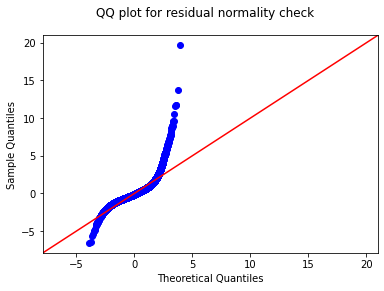

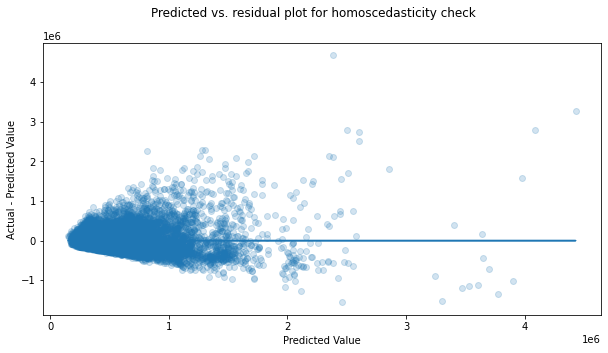

In [382]:
x_quality=df_clean[['sqft_living','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13']]
#plot the model
reg_qq_sced(y,x_quality)